<a href="https://colab.research.google.com/github/suyanli220/Multimodal-Composite-Editing-and-Retrieval/blob/main/d2l.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch

创建一个丛0到指定数的张量，并且获得这个张量的形状和其含有的元素数量

In [4]:
x = torch.arange(12)
x,x.shape,x.numel()

(tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 torch.Size([12]),
 12)

改变张量大小的方法

In [ ]:
X = x.reshape(3, 4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

创建全零张量和全一张量的方式

In [ ]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
torch.ones((2,2,3))

tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])

In [ ]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

张量的运算

In [ ]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

张量的串联，按不同的维度

In [ ]:
x = torch.arange(12, dtype=torch.float32).reshape(3, 4)
y = torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((x, y), dim = 0),torch.cat((x, y), dim = 1),torch.cat((x, y), dim = -2),torch.cat((x, y), dim = -1) #dim=0，行加； dim=1，列加

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

选定张量中的某一元素

In [ ]:
x[-1],x[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

张量转化为布尔值

In [ ]:
x == y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

张量中各元素的求和

In [ ]:
x.sum()

tensor(66.)

广播机制

In [ ]:
a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))
a,b, a+b #广播机制，自动复制

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]),
 tensor([[0, 1],
         [1, 2],
         [2, 3]]))

张量中指定元素的修改

In [ ]:
x[1, 2] = 9
x

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [ ]:
x[0:2, :] =12
x

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

张亮的存储位置

In [ ]:
before = id(x)
x += y
id(x) == before

True

numpy和张量的区别

In [ ]:
A = x.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [ ]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

##数据预处理

In [2]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
  f.write('NumRooms, Alley, Price\n')
  f.write('NA,Pave,127500\n')
  f.write('2.0, NA,106000\n')
  f.write('4.0, NA,178100\n')
  f.write('NA, NA,140000\n')

In [3]:
import pandas as pd
data = pd.read_csv(data_file)
data
print(data)

   NumRooms  Alley   Price
0       NaN   Pave  127500
1       2.0     NA  106000
2       4.0     NA  178100
3       NaN     NA  140000


In [6]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
# inputs['NumRooms'] = inputs['NumRooms'].fillna(inputs['NumRooms'].mean())
inputs = inputs.fillna(inputs.mean(numeric_only=True))
inputs

,NumRooms,Alley
0,3.0,Pave
1,2.0,NA
2,4.0,NA
3,3.0,NA


In [9]:
inputs = pd.get_dummies(inputs, dummy_na=True).astype(int)
inputs

,NumRooms,Alley_ NA,Alley_Pave,Alley_nan
0,3,0,1,0
1,2,1,0,0
2,4,1,0,0
3,3,1,0,0


In [10]:
import torch
x, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
x, y

(tensor([[3, 0, 1, 0],
         [2, 1, 0, 0],
         [4, 1, 0, 0],
         [3, 1, 0, 0]]),
 tensor([127500, 106000, 178100, 140000]))

## 7 自动求导

In [67]:
import torch
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [68]:
x.requires_grad_(True)
x.grad

In [69]:
y = 2*torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [70]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [71]:
x.grad==4*x

tensor([True, True, True, True])

In [72]:
x.grad.zero_()
y=x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [ ]:
x.grad.zero_()
y = x * x
#y.backward()
x.grad

In [73]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x
z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [74]:
def f(a):
  b = a * 2
  while b.norm() < 1000
    b = b * 2
    if b.sum() > 0:
    c = b
  else:
    c = 100 * b
  return c
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

a.grad == d / a

SyntaxError: expected ':' (<ipython-input-74-525722a6e003>, line 3)

## 8 线性回归从零开始实现

In [8]:
!pip install d2l

In [9]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

features: tensor([-0.6866,  1.6732]) 
label: tensor([-2.8725])


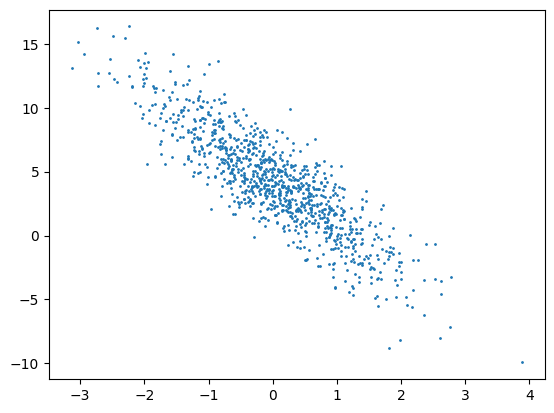

In [15]:
def synthetic_data(w, b, num_examples):
  X = torch.normal(0, 1, (num_examples, len(w)))
  y = torch.matmul(X, w) + b
  y += torch.normal(0, 0.01, y.shape)
  return X, y.reshape((-1,1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

print( 'features:', features[0], '\nlabel:', labels[0])

#d2l.get_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(),
                labels.detach().numpy(), 1);




In [19]:
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  random.shuffle(indices)
  for i in range(0, num_examples, batch_size):
    batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
    yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
  print(X, '\n', y)
  break

tensor([[-0.2429, -0.0700],
        [ 0.2754, -0.0771],
        [ 0.0641, -0.0318],
        [-0.2462, -0.1938],
        [-0.3522, -0.4950],
        [-1.2620, -0.8918],
        [-0.1974,  0.4436],
        [ 0.9685,  0.1724],
        [-1.8691, -1.7461],
        [-0.7913,  0.6825]]) 
 tensor([[3.9515],
        [5.0236],
        [4.4182],
        [4.3621],
        [5.1644],
        [4.6987],
        [2.2847],
        [5.5536],
        [6.3960],
        [0.2954]])


In [20]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [21]:
def linreg(X, w, b):
  return torch.matmul(X, w) + b

In [22]:
def squared_loss(y_hat, y):
  return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [30]:
def sgd(params, lr, batch_size):
  with torch.no_grad():
    for param in params:
      param -= lr * param.grad / batch_size
      param.grad.zero_()

In [32]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
  for X, y in data_iter(batch_size, features, labels):
    l = loss(net(X, w, b), y)
    l.sum().backward()
    sgd([w, b], lr, batch_size)
  with torch.no_grad():
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
print(f'w的估计误差：{true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差：{true_b - b}')


epoch 1, loss 0.000048
epoch 2, loss 0.000048
epoch 3, loss 0.000048
w的估计误差：tensor([-2.8276e-04, -2.1458e-05], grad_fn=<SubBackward0>)
b的估计误差：tensor([-0.0001], grad_fn=<RsubBackward1>)


In [34]:
%matplotlib inline
import random
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [35]:
def load_array(data_arrays, batch_size, is_train=True):
  dataset = data.TensorDataset(*data_arrays)
  return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_aize = 10
data_iter = load_array((features, labels), batch_size)

next(iter(data_iter))

[tensor([[-0.8924,  1.6883],
         [ 0.6113, -0.2072],
         [ 0.9544, -0.1342],
         [-1.6145, -1.6116],
         [-1.1609, -0.9975],
         [-0.3947, -0.4588],
         [-0.0659, -2.3206],
         [ 0.5995, -2.2279],
         [-1.2684, -0.5206],
         [ 0.2587, -2.1955]]),
 tensor([[-3.3170],
         [ 6.1182],
         [ 6.5454],
         [ 6.4485],
         [ 5.2725],
         [ 4.9677],
         [11.9808],
         [12.9866],
         [ 3.4539],
         [12.1731]])]

In [38]:
from torch import nn
net = nn.Sequential(nn.Linear(2, 1))

net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

loss = nn.MSELoss()

trainer = torch.optim.SGD(net.parameters(), lr =0.03)



In [40]:
num_epochs = 3
for epoch in range(num_epochs):
  for X, y in data_iter:
    l = loss(net(X), y)
    trainer.zero_grad()
    l.backward()
    trainer.step()
  l = loss(net(features), labels)
  print(f'epoch {epoch + 1}, loss {float(l):f}')

epoch 1, loss 0.000214
epoch 2, loss 0.000108
epoch 3, loss 0.000109


## 9 交叉熵 + 损失函数 + mnist数据读取 + softmax回归

In [ ]:
import numpy as np

def cross_entropy(y_hat, y):
  return -torch.log(y_hat[range(len(y_hat)), y])

def cross_entropy(x,y)
	return -torch.sum(x * torch.log(y) + (1-x) * torch.log(1-y))/len(x)

def cross_entropy(x,y)
	loss = -np.mean(x *np.log(y) +(1-x)*np.log(1-y))
	return loss

In [ ]:
# MSE loss :三条线，似然函数
# L1 loss
# Huber's Robust loss

In [ ]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

In [ ]:
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root="../data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(root="../data", train=False, transform=trans, download=True)

len(mnist_train), len(mnist_test)
mnist_train[0][0].shape

In [ ]:
def get_fashion_mnist_labels(labels):
  text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
  return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
  figsize = (num_cols * scale, num_rows * scale)
  _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
  axes = axes.flatten()
  for i, (ax, img) in enumerate(zip(axes, imgs)):
    if torch.is_tensor(img):
      ax.imshow(img.numpy())
    else:
      ax.imshow(img)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if titles:
      ax.set_title(titles[i])

In [ ]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y))

In [77]:
batch_size = 256

def get_dataloader_workers():
  return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers())

timer = d2l.Timer()
for X, y in train_iter:
  continue
f'{timer.stop():.2f} sec'

NameError: name 'mnist_train' is not defined

In [ ]:
def load_data_fashion_mnist(batch_size, resize=None):
  trans = [transforms.ToTensor()]
  if resize:
    trans.insert(0, transforms.Resize(resize))
  trans = transforms.Compose(trans)
  mnist_train = torchvision.datasets.FashionMNIST(root="../data", train=True, transform=trans, download=True)
  mnist_test = torchvision.datasets.FashionMNIST(root="../data", train=False, transform=trans, download=True)
  return (data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()),
          data.DataLoader(mnist_test, batch_size, shuffle=False, num_workers=get_dataloader_workers()))

In [78]:
import torch
from IPython import display
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

100%|██████████| 26.4M/26.4M [00:01<00:00, 18.9MB/s]


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 308kB/s]


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.60MB/s]


Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 4.70MB/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw




/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [79]:
num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

In [80]:
x = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
x.sum(0, keepdim=True), x.sum(1, keepdim=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [81]:
def softmax(X):
  X_exp = torch.exp(X)
  partition = X_exp.sum(1, keepdim=True)
  return X_exp / partition

In [83]:
X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.0651, 0.1725, 0.1509, 0.1325, 0.4791],
         [0.0147, 0.4374, 0.0676, 0.4298, 0.0505]]),
 tensor([1.0000, 1.0000]))

In [84]:
def net(X):
  return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

In [85]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [86]:
def cross_entropy(y_hat, y):
  return -torch.log(y_hat[range(len(y_hat)), y])

cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

In [87]:
def accuracy(y_hat, y):
  if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
    y_hat = y_hat.argmax(axis=1)
  cmp = y_hat.type(y.dtype) == y
  return float(cmp.type(y.dtype).sum())

accuracy(y_hat, y) / len(y)

0.5

In [93]:
def evaluate_accuracy(net, data_iter):
  if isinstance(net, torch.nn.Module):
    net.eval()
  metric = Accumulator(2)
  for X, y in data_iter:
    metric.add(accuracy(net(X), y), y.numel())
  return metric[0] /metric[1]

In [94]:
class Accumulator:
  def __init__(self, n):
    self.data = [0.0] * n
  def add(self, *args):
    self.data = [a + float(b) for a, b in zip(self.data, args)]
  def reset(self):
    self.data = [0.0] * len(self.data)

  def __getitem__(self, idx):
    return self.data[idx]

evaluate_accuracy(net, test_iter)

0.0331

In [103]:
def train_epoch_ch3(net, train_iter, loss, updater):
  if isinstance(net, torch.nn.Module):
    net.train()
  metric = Accumulator(3)
  for X, y in train_iter:
    y_hat = net(X)
    l = loss(y_hat, y)
    if isinstance(updater, torch.optim.Optimizer):
      updater.zero_grad()
      l.mean().backward()
      updater.step()
    else:
      l.sum().backward()
      updater(X.shape[0])
  return metric[0] / metric[2], metric[1] / metric[2]

In [98]:
class Animator:
  def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None, xscale='linear', yscale='linear', fmts=('-', 'm--','g-.','r:'), nrows=1, ncols=1, figsize=(3.5, 2.5)):
    if legend is None:
      legend = []
    d2l.use_svg_display()
    self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
    if nrows * ncols == 1:
      self.axes = [self.axes, ]
    self.config_axes = lambda: d2l.set_axes(self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
    self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
      if not hasattr(y, "__len__"):
        y = [y]
        n = len(y)
      if not hasattr(x, "__len__"):
        x = [x] * n

In [100]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
  animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9], legend=['train loss', 'train acc', 'test acc'])
  for epoch in range(num_epochs):
    train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
    test_acc = evaluate_accuracy(net, test_iter)
    animator.add(epoch + 1, train_metrics + (test_acc,))
  train_loss, train_acc = train_metrics


In [101]:
lr = 0.1

def updater(batch_size):
  return d2l.sgd([W, b], lr, batch_size)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


ZeroDivisionError: float division by zero

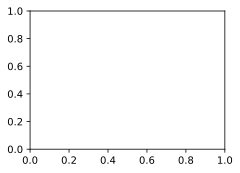

In [104]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

In [ ]:
def predict_ch3(net, test_iter, n=6):
  for X, y in test_iter:
    break
  trues = d2l.get_fashion_mnist_labels(y)
  preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
  titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
  d2l.show_images(X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)

In [106]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 256), nn.ReLU(), nn.Linear(256, 10))

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## 10 MLP 代码实现